### **Random Forest Hyper Parameters**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("rice.xlsx")

1. Alan: Pirinç tanesinin sınırları içindeki piksel sayısını verir.
2. Çevre: Pirinç tanesinin sınırları etrafındaki pikseller arasındaki mesafeyi hesaplayarak çevreyi hesaplar.
3. Ana Eksen Uzunluğu: Pirinç tanesi üzerine çizilebilecek en uzun çizgiyi yani ana eksen mesafesini verir.
4. Küçük Eksen Uzunluğu: Pirinç tanesine çizilebilecek en kısa çizgiyi yani küçük eksen mesafesini verir.
5. Eksantriklik: Pirinç tanesi ile aynı momentlere sahip olan elipsin ne kadar yuvarlak olduğunu ölçer.
6. Dışbükey Alan: Pirinç tanesinin oluşturduğu bölgenin en küçük dışbükey kabuğunun piksel sayısını verir.
7. Kapsam: Pirinç tanesinin oluşturduğu bölgenin sınırlayıcı kutu piksellerine oranını verir
8. Sınıf: Commeo ve Osmancık.

https://www.kaggle.com/datasets/muratkokludataset/rice-dataset-commeo-and-osmancik

Murat hocamıza sevgilerimizi gönderiyoruz

In [4]:
df.isna().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   int64  
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   int64  
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 238.3+ KB


In [6]:
df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413
25%,11370.500000,426.144753,174.353855,82.731695,0.872402,11626.250000,0.598862
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050


In [8]:
df["Class"].unique()

array(['Cammeo', 'Osmancik'], dtype=object)

<Axes: xlabel='Class', ylabel='count'>

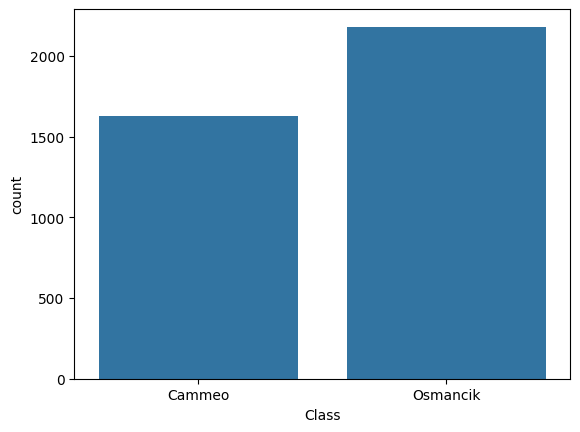

In [9]:
sns.countplot(x = "Class", data=df)

In [10]:
df["Class"].value_counts()

Class
Osmancik    2180
Cammeo      1630
Name: count, dtype: int64

In [11]:
df.columns

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Eccentricity', 'Convex_Area', 'Extent', 'Class'],
      dtype='object')

<Axes: xlabel='Area', ylabel='Perimeter'>

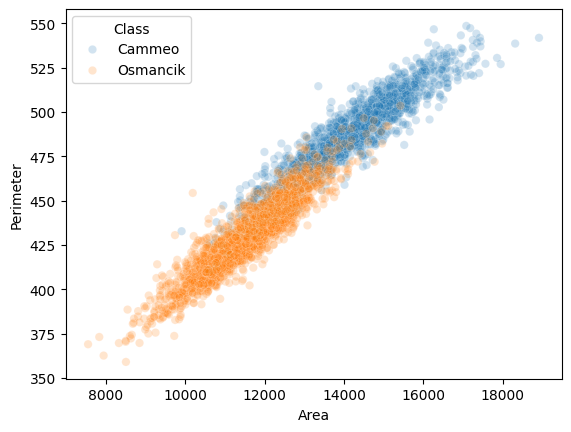

In [13]:
sns.scatterplot(x = "Area", y= "Perimeter", data=df, alpha= 0.2, hue="Class")

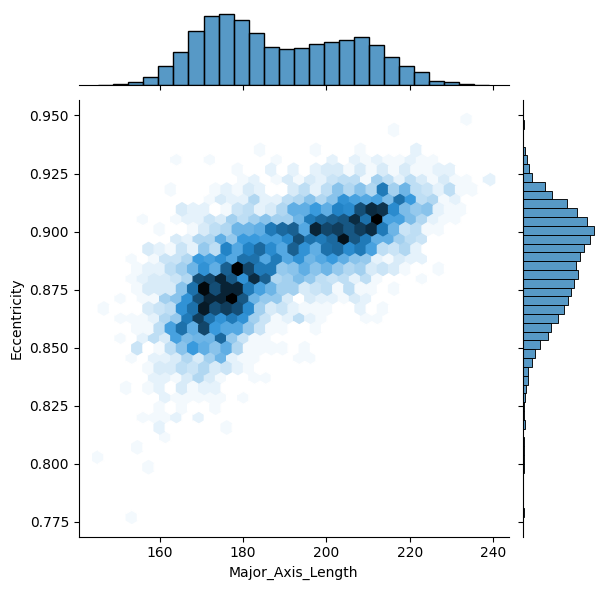

In [15]:
sns.jointplot(kind="hex", x = "Major_Axis_Length", y = "Eccentricity", data=df)

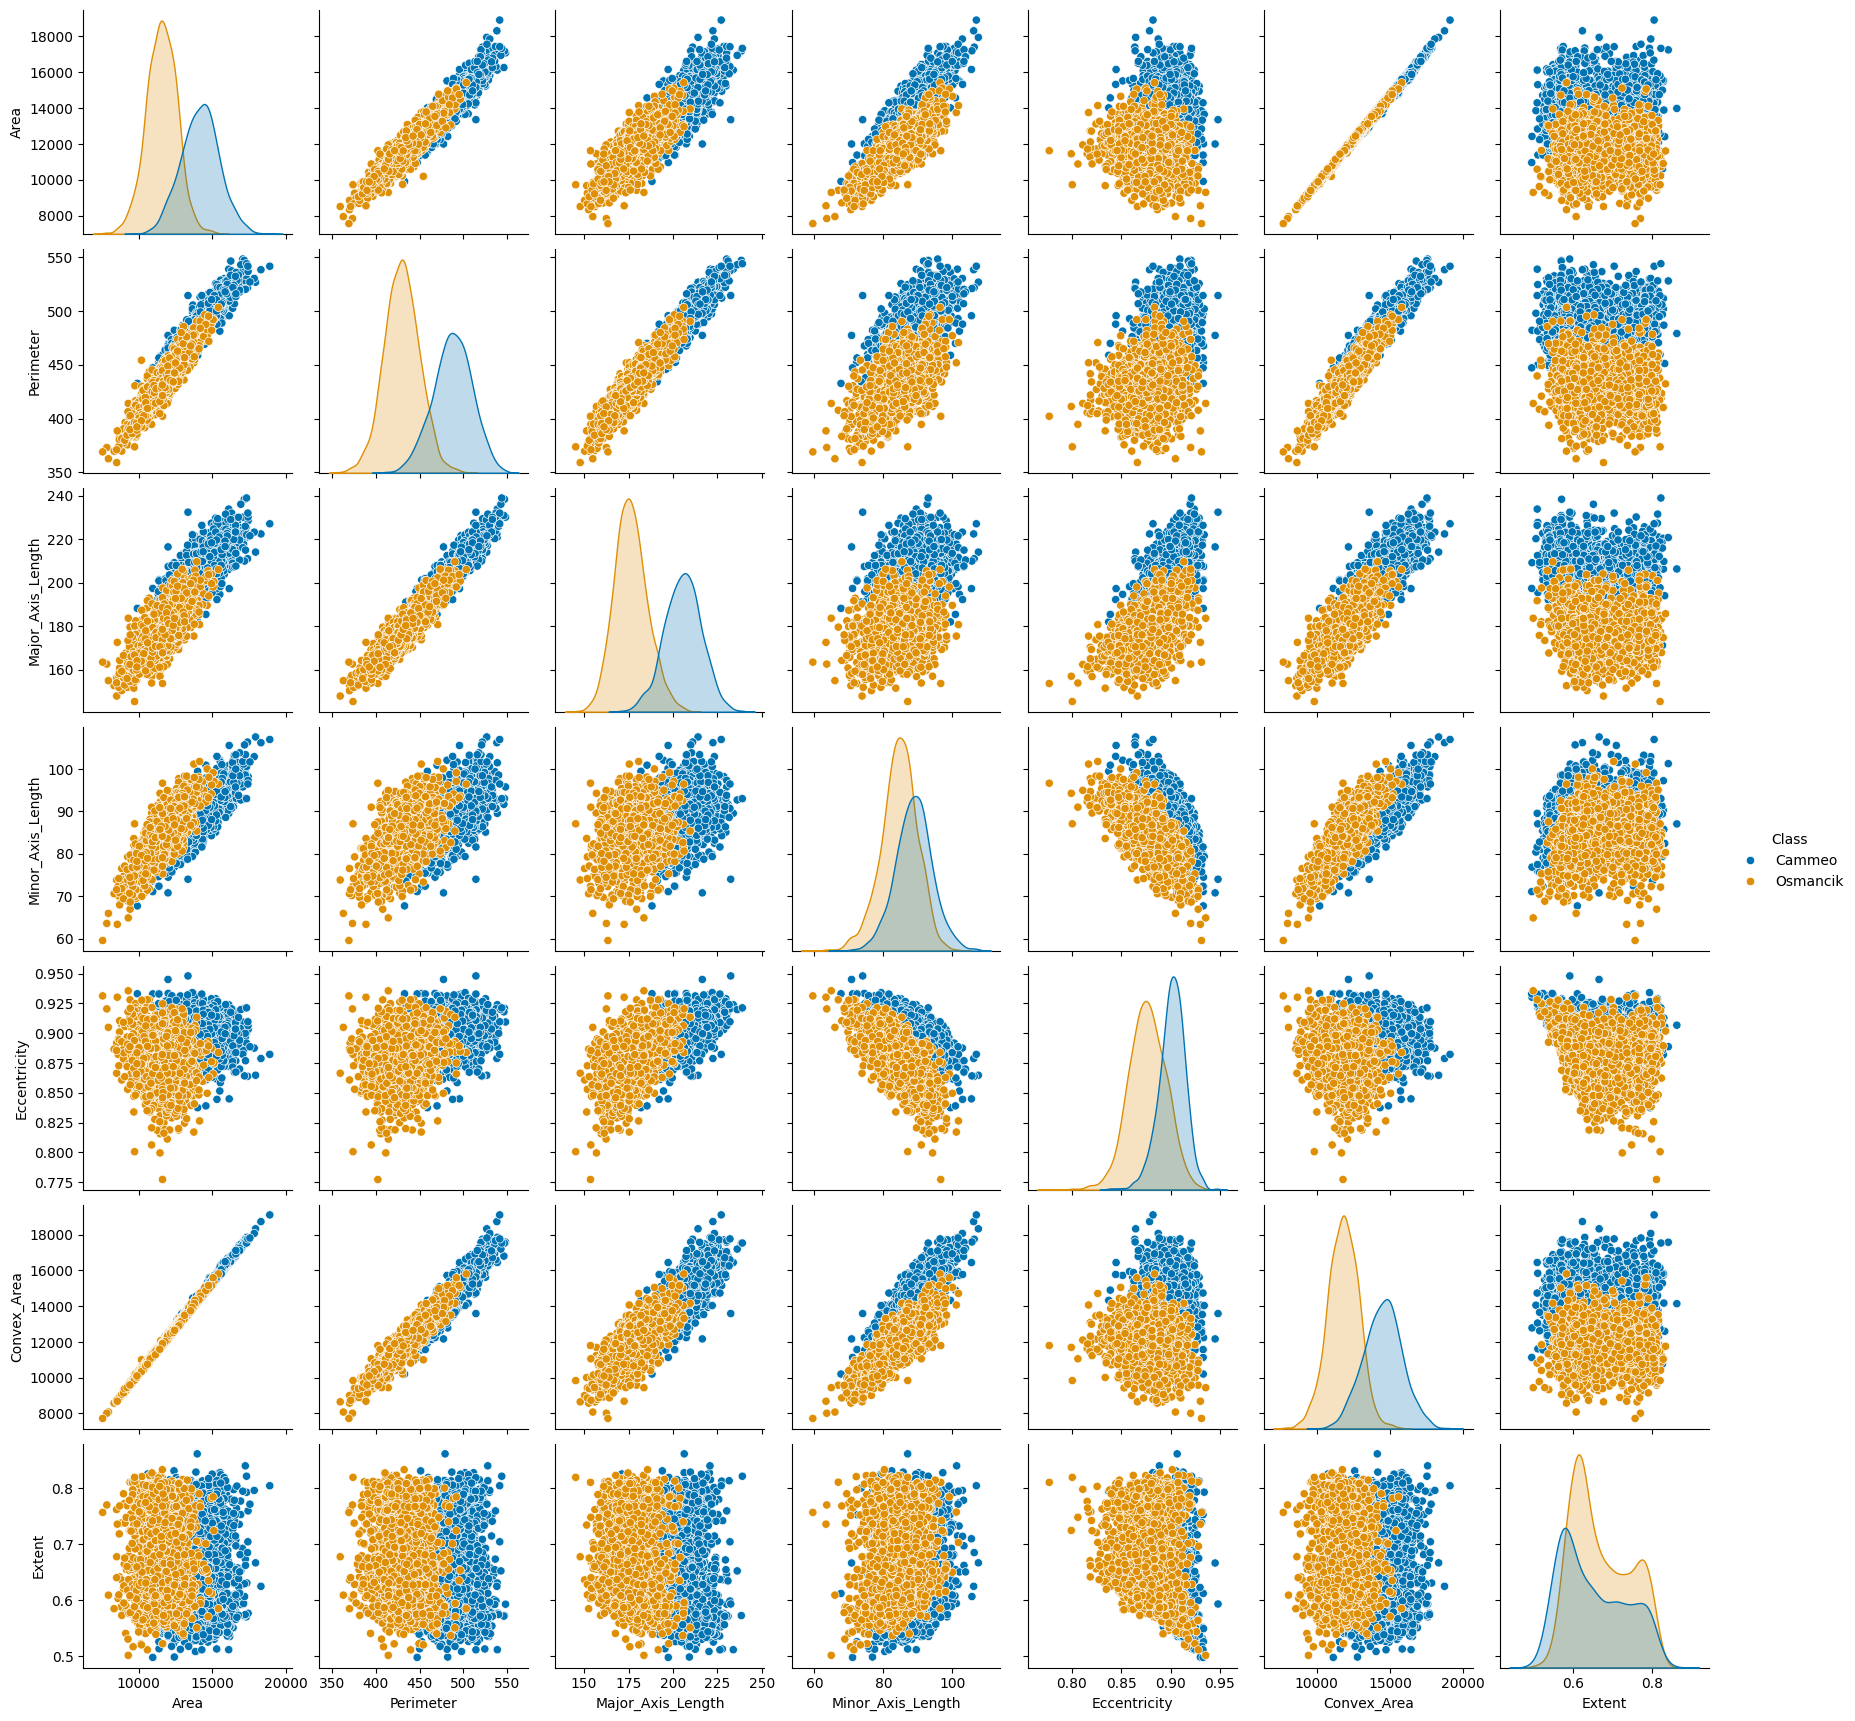

In [16]:
sns.pairplot(data=df, hue="Class", palette="colorblind")

#### **Train Test Split**

In [18]:
X = df.drop("Class", axis= 1)
y = df["Class"]

In [19]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=9)
# Verimiz büyük olduğu için test size ımızı küçük seçtik

In [ ]:
len(X_train) 

3429

In [23]:
len(X_test)

381

### **Hyper Orman**

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
n_est = [9, 64, 128, 200] # Farazi olarak girdik Ağaç sayılarımız
max_feat = [1,2,3,4] # Ağaçta her sağa sola giden bölünemede kullanılacak veri sayısı hani örneğin 3 veriye aynı anda bakıp sağa ya da sola gidecek
bootstrap_sec = [True, False]
# Bootstrap False ise her ağaç için bütün veriler kullanılır , True ise 3429 tanenin içinden bir kaç tanesini seçip onları kullanmak isteyecek
oob = [True, False]
# Bu sadece bootstrap True ise yani veri seçilecekse çalışıyor Bunun görevi ise 3429 tane veriden 30 tanesini seçtim boostrap kısmında bu yeni farklı bir veri ekleyeyimmi bir yanlılık katalımmı diye var (out of bag) anlamı 

In [ ]:
parameters = {
    "n_estimators" : n_est,
    "max_features" : max_feat,
    "bootstrap"    : bootstrap_sec,
    "oob_score"    : oob
    }

In [ ]:
random_forest  = RandomForestClassifier()

In [ ]:
# Burada yaptığı 9 ağaç için her bir parametreyi deniyor sonra 64 için de deniyor hepsi için bunu yapıyor
grid = GridSearchCV(
    random_forest, 
    parameters
    )

In [30]:
grid.fit(X_train, y_train)

C:\Users\himme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\himme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\himme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\himme\AppData\Local\Packages\PythonSoftwareFoundation.P

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [1, 2, 3, 4],
                         'n_estimators': [9, 64, 128, 200],
                         'oob_score': [True, False]})

In [39]:
grid.best_params_

{'bootstrap': True, 'max_features': 1, 'n_estimators': 200, 'oob_score': True}

In [31]:
grid.best_estimator_

RandomForestClassifier(max_features=1, n_estimators=200, oob_score=True)

In [33]:
pilav_pred = grid.predict(X_test)

### **Değerlerndirme**

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

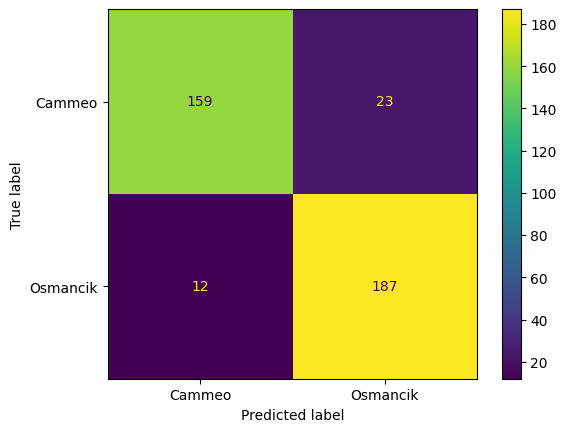

In [35]:
ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test)

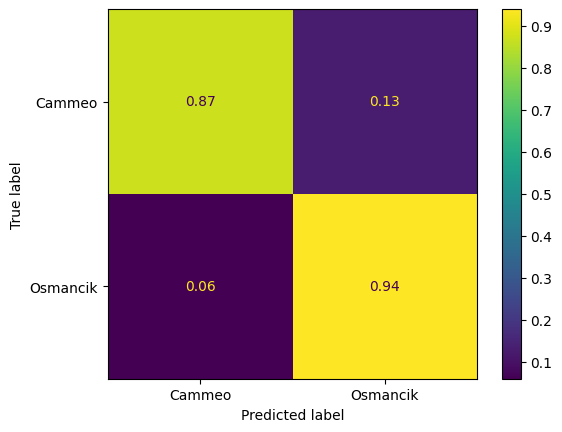

In [38]:
ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test, normalize= "true")

In [36]:
print(classification_report(pilav_pred, y_test))

              precision    recall  f1-score   support

      Cammeo       0.87      0.93      0.90       171
    Osmancik       0.94      0.89      0.91       210

    accuracy                           0.91       381
   macro avg       0.91      0.91      0.91       381
weighted avg       0.91      0.91      0.91       381



### Estimator Sayısı Belirleme

In [40]:
from sklearn.metrics import accuracy_score

Bizim burda aşşağıda yaptığımız işlem en iyi n_est i yani ağaç sayısını bulmak yukarıda ise grid search kısmında bazı parametreleri vererek en iyi parametreleri bulmuştuk bu kısımda ise en iyi n_est i bularak modelimizin en iyi hangi şartlarda ve parametrelerde çalışacağını buluyoruz

In [47]:
hata_payi = [] # Hata payi
yanlis_secim = [] # Kaç pilavin yanlış seçildiği

for n in range(1, 130):
    rand_forest_class = RandomForestClassifier(n_estimators=n, bootstrap= True , oob_score = False, max_features=1)
# Yukarıda best_params lar grid searchte gelmişti onları ekledik boostrap oob ve max_features için
    
    rand_forest_class.fit(X_train, y_train)
    pirinc_pred = rand_forest_class.predict(X_test)

    error = 1 - accuracy_score(pirinc_pred, y_test)

    sample = y_test.to_numpy()
    # y_testi numpy türüne çevirdik
    sample = sample.reshape(1, -1)[0]
    # Bu sampleı böyle yazmalıyız Tek satırda yazmak için

    # Aşşağıda hatalı verileri bulabilmek için sample muhabbeti var
    n_missed = np.sum(pirinc_pred != sample)
    hata_payi.append(error)
    yanlis_secim.append(n_missed)

In [48]:
# Biz yukarıda GridSearch den öne n_estimatorsları kendimiz belirleyip seçtirmişik burada for ile daha iyi bir estimators(ağaç) sayısı var mı diye bakıyoruz

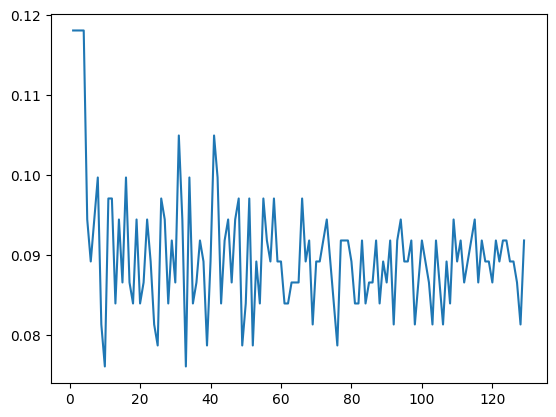

In [49]:
plt.plot(range(1,130), hata_payi)

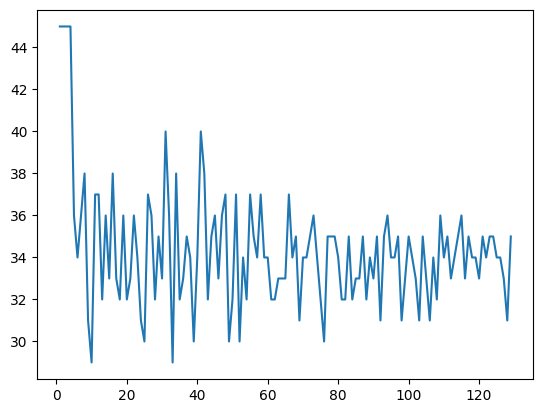

In [50]:
plt.plot(range(1,130), yanlis_secim    )